# Exercise 1
(a) Consider the nonlinear equation:

$$
f(x) = -cos(x) + x^3 + 2x^2 + 1 = 0
$$

In [1]:
import numpy as np
def function(x):
    # Define function f(x) = -cos(x) + x**3 + 2*x**2 + 1
    return (-np.cos(x) + x**3 + 2*x**2 + 1)

def dfunction(x):
    # Define derivative of function f'(x) = sin(x) + 3*x**2 + 4*x
    return (np.sin(x) + 3*x**2 + 4*x)

To consider how many real solution the function has in the interval $x \in [-3, 1]$, the function can be plotted:

Text(0, 0.5, 'f(x)')

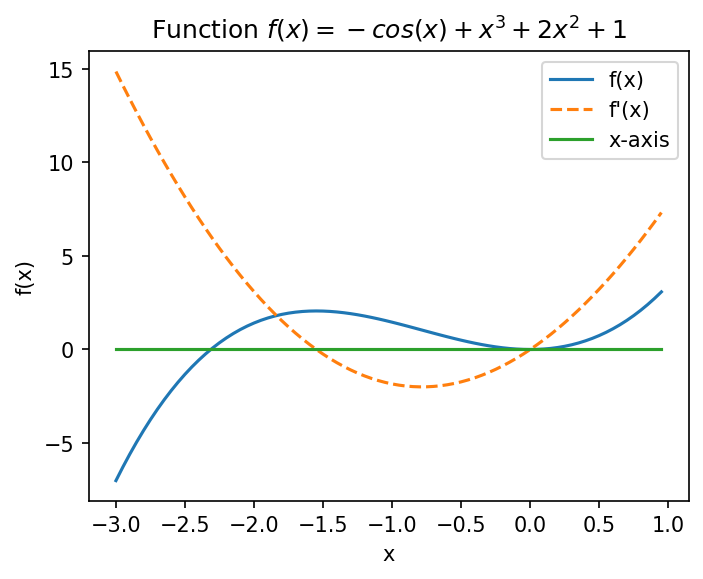

In [2]:
from matplotlib import pyplot as plt


x=np.arange(-3, 1, 0.05)
y=function(x)
dy = dfunction(x)
#fig, axes = plt.subplots(1, , figsize=(12, 5), dpi=150, constrained_layout=True)
fig=plt.figure(figsize=(4, 3), dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,dy,'--')
ax.plot(x,0*y)
ax.set_title('Function $f(x) = -cos(x) + x^3 + 2x^2 + 1$')
ax.legend(['f(x)', "f'(x)", 'x-axis'])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

It can be seen from the plot that the function has two real solutions in the interval $x \in [-3.0, 1.0]$. The first solution is clearly at $x = 0$, the second is in the interval $x \in [-2.5, 2.0]$.

(b) i. At $x = 0$ the function is equal to zero and its derivative is also equal to zero so the order of convergence is linear. At the second root, the derivative of the function is not equal to zero so the order of convergence is quadratic.

In [3]:
def myNewton(fnon, dfdx, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # dfdx     - name of the derivative function df(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    f = eval(fnon)(x,*fnonargs)

    print(' k  xk          f(xk)')

    # Main Newton loop
    while (abs(f) > tol and k < maxk):
        # Evaluate function derivative
        d = eval(dfdx)(x,*fnonargs)

        # Take Newton step
        x = x - f/d
        f = eval(fnon)(x,*fnonargs)
        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, x, abs(f)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

(b) ii. Implementing the Newton method as set out in the lecture notes, three roots can be found due to the solver converging either from the left of the right of the root at $x = 0$.

For an initial guess $x_0 = -2$:

In [4]:
myNewton('function', 'dfunction', -2, 1e-6, 100)

 k  xk          f(xk)
 1  -2.45819577  9.93e-01
 2  -2.32858671  9.44e-02
 3  -2.31342784  1.22e-03
 4  -2.31322658  2.14e-07
Converged


In [5]:
q = np.log((1/0.5)*abs(-2.31322658 - -2.31342784))/np.log(abs(-2.31322658 - -2.32858671))
print(q)

1.8720792744721033


For an initial guess of $x_0 = -1$:

In [6]:
myNewton('function', 'dfunction', -1, 1e-6, 100)

 k  xk          f(xk)
 1  -0.20731974  9.85e-02
 2  -0.09865838  2.34e-02
 3  -0.04828574  5.72e-03
 4  -0.02390178  1.41e-03
 5  -0.01189281  3.52e-04
 6  -0.00593215  8.78e-05
 7  -0.00296254  2.19e-05
 8  -0.00148039  5.48e-06
 9  -0.00073998  1.37e-06
10  -0.00036993  3.42e-07
Converged


In [7]:
q = np.log((1/0.5)*abs(-0.00036993))/np.log(abs(-0.00076998))
print(q)

1.0055660132011033


For an initial guess of $x_0 = 1$:

In [8]:
myNewton('function', 'dfunction', 1, 1e-6, 100)

 k  xk          f(xk)
 1  0.55879481  9.51e-01
 2  0.30188833  2.55e-01
 3  0.15848656  6.67e-02
 4  0.08150846  1.71e-02
 5  0.04138345  4.35e-03
 6  0.02085827  1.10e-03
 7  0.01047203  2.75e-04
 8  0.00524690  6.90e-05
 9  0.00262619  1.73e-05
10  0.00131379  4.32e-06
11  0.00065707  1.08e-06
12  0.00032858  2.70e-07
Converged


In [9]:
q = np.log((1/0.5)*abs(-0.00032858))/np.log(abs(-0.00065707))
print(q)

0.9999813090118126


It can be seen from the from the iterations for the three initial guesses that the solver converges to the root a $x = 0$ slower than the root at $x \approx -2.31$. The order of convergence can be approximated by assuming $\alpha = 0.5$ and calculating q from the last iteration. The order of convergence for the root at $x = 0$ is 1.0 and the order of convergence for the root at $x \approx -2.31$ is approximately 1.9.

(b) iii. Finding the root using the bisection method is possible for the simple root. However it cannot find the root at $x = 0$ as the function does not change sign across an interval containing that root that does not also include the simple root. Therefore the bracket condition cannot be satisfied.

### (c) Dekkers Algorithm


In [10]:
def dekker(fnon, xbounds, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # xbounds  - initial bracket [xL, xR]
    # tol      - stopping tolerance
    # maxk     - maximum number of iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)

    k = 0
    a, b = xbounds
    print(' k  xk          f(xk)')
    b0 = a
    fb = eval(fnon)(b,*fnonargs)
    iterates = []

    # Main bisection loop
    while (abs(fb) > tol and k < maxk): #update

        fa = eval(fnon)(a,*fnonargs)
        fb0 = eval(fnon)(b0,*fnonargs)
        iterates.append(b)

        #Bisection
        m = (a + b) / 2    
        
        #Implement secant method
        
        if (fb == fb0):
            s = m
        else:
            s = b - fb*(b - b0)/(fb - fb0)
       
        # Select new value of b based on result of secant

        #Check if after swap
        if (m < s < b) or (m > s > b):
            b1 = s
        else:
            b1 = m

        fb1 = eval(fnon)(b1,*fnonargs)
        
        if (fa*fb1 > 0):
            a = b
                       
        if (abs(eval(fnon)(a,*fnonargs)) < abs(fb1)):
            a, b1 = b1, a
        
        b0, b = b, b1
        fb = eval(fnon)(b,*fnonargs)
        
        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, b, abs(fb)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

    return iterates

In [11]:
dekker('function', [-3,1], 1e-6, 100)

 k  xk          f(xk)
 1  -0.32179374  2.25e-01
 2  -0.41378380  3.56e-01
 3  -1.70689190  1.99e+00
 4  -2.35344595  2.52e-01
 5  -2.28064072  1.92e-01
 6  -2.31209175  6.87e-03
 7  -2.31325946  2.00e-04
 8  -2.31322651  1.97e-07
Converged


[1,
 -0.3217937387377827,
 -0.4137837953854445,
 -1.7068918976927223,
 -2.3534459488463613,
 -2.2806407192659415,
 -2.3120917484530077,
 -2.313259456426466]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 k  xk          f(xk)
 1  -0.32179374  2.25e-01
 2  -0.41378380  3.56e-01
 3  -1.70689190  1.99e+00
 4  -2.35344595  2.52e-01
 5  -2.28064072  1.92e-01
 6  -2.31209175  6.87e-03
 7  -2.31325946  2.00e-04
 8  -2.31322651  1.97e-07
Converged
xstar [-2.31322654]


Text(0, 0.5, 'Error $e_k = |x_k|$')

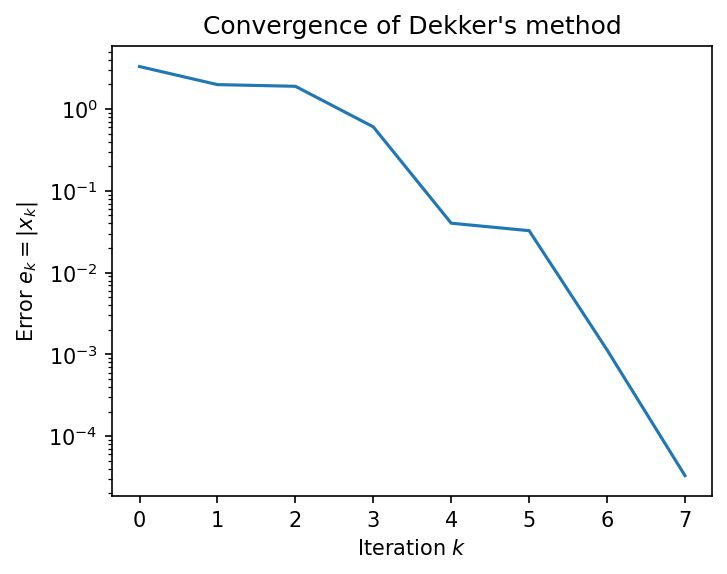

In [12]:
import math
from scipy.optimize import fsolve

xk = dekker('function', [-3,1], 1e-6, 1000);
ek = xk
xstar = fsolve(function,-2.3)
print(f'xstar {xstar}')
for k in range(0, len(xk)):
  ek[k] = abs(xk[k]-xstar)

from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
k=np.arange(0, len(xk))
fig=plt.figure(figsize=(4, 3), dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.semilogy(k,ek)
ax.set_title('Convergence of Dekker\'s method')
ax.set_xlabel('Iteration $k$')
ax.set_ylabel('Error $e_k = |x_k|$')

 k  xk          f(xk)
 1  -0.32179374  2.25e-01
 2  -0.41378380  3.56e-01
 3  -1.70689190  1.99e+00
 4  -2.35344595  2.52e-01
 5  -2.28064072  1.92e-01
 6  -2.31209175  6.87e-03
 7  -2.31325946  2.00e-04
 8  -2.31322651  1.97e-07
 9  -2.31322654  5.65e-12
10  -2.31322654  0.00e+00
Converged
[array([0.60105543]), array([0.9538071]), array([0.31921712]), array([0.06633203]), array([0.81020143]), array([0.03482473]), array([0.02900562]), array([0.00098848]), array([2.86631186e-05])]


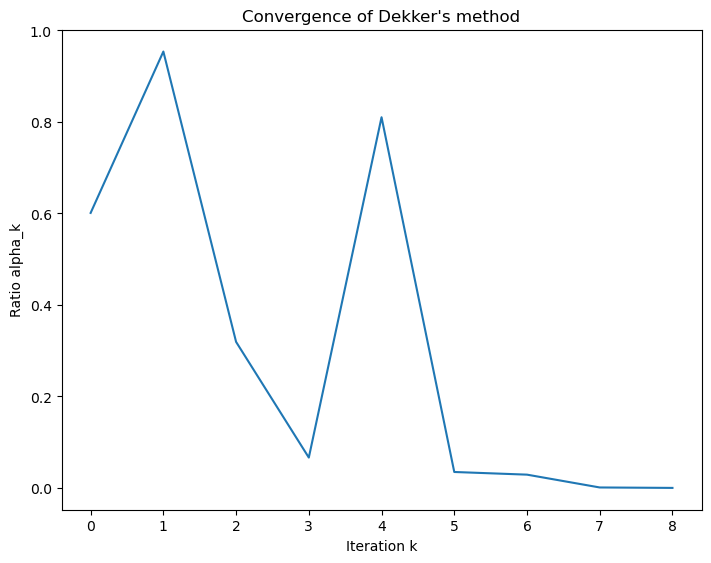

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import math

xk = dekker('function', [-3,1], 1e-12, 1000);
ek = xk
alpha = []

q = 1

for k in range(0, len(xk)):
  ek[k] = abs(xk[k] - xstar)

for k in range(0, len(xk)-1):
 alpha.append(ek[k+1] / pow(ek[k],q))

%matplotlib inline
k=np.arange(0, len(xk)-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(k,alpha)
ax.set_title('Convergence of Dekker\'s method')
ax.set_xlabel('Iteration k')
ax.set_ylabel('Ratio alpha_k')

print(alpha)

Plotting the error between the solution from Dekkker's method and that found using the scipy fsolve function, the order of convergence appears to be linear (see Figure). The ratio of alpha k suggests that the order of convergence is linear. Values of q greater than 1.1 result in growth of the ratio alpha k until the final iteration when the solution matches that from the fsolve function. Values of q less than 0.8 result in the alpha ratio descending to zero. Therefore the order of convergence is between 0.8 and 1.1.

# Exercise 2

(a) Consider the nonlinear system of equations
$$
\begin{align}
F_1(x,y) &= x^2 +2y^2 + sin(2x) = 0 \\
F_2(x,y) &= x^2 +cos(x +5y) - 1.2 = 0
\end{align}
$$

The Jacobian is constructed from the partial derivatives of each equation:
$$

\begin{bmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y} \\
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{bmatrix}
=
\begin{bmatrix}
2x + 2\cos(2x) & 4y \\
2x - \sin(x + 5y) & -5\sin(x + 5y)
\end{bmatrix}

$$

(b) the isocontours of the function $\psi(x) := |F(x)|$ in the square $(x,y) \in [-2,2] \times [-2,2]$ are presented below:

/tmp/ipykernel_1033/360930618.py:21: UserWarning: linewidths is ignored by contourf
  CS = ax.contourf(X, Y, Z, levels=crange, linewidths=0.5)


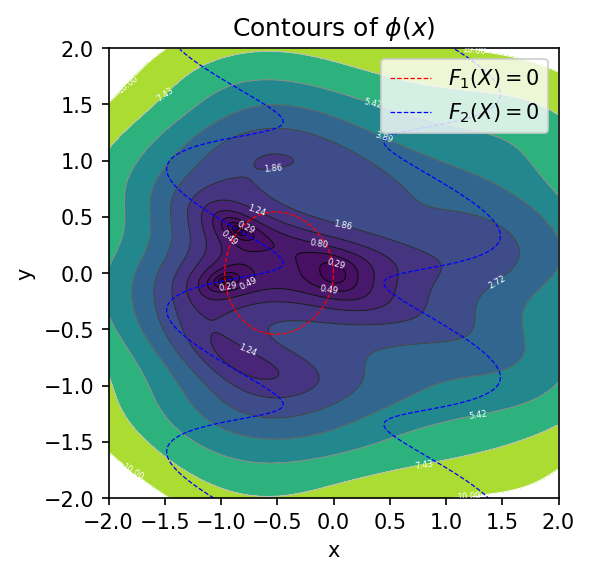

In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import numpy as np

delta = 0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
F1 = X**2 + 2*Y**2 + np.sin(2*X)
F2 = X**2 + np.cos(X + 5*Y) -1.2
Z = np.sqrt(F1**2 + F2**2)

fig = plt.figure(figsize=(4, 3),dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.set_aspect('equal','box')

#Plot contours
crange0 = np.linspace(0,1,20)
crange = crange0**5.5 * 10
CS = ax.contourf(X, Y, Z, levels=crange, linewidths=0.5)
CS = ax.contour(X, Y, Z, levels=crange, cmap=cm.gray, linewidths=0.5)
# Plot F1=0 and F2=0 as dashed lines

ax.contour(X, Y, F1, levels=[0], colors='red', linestyles='dashed', linewidths=0.6)
ax.contour(X, Y, F2, levels=[0], colors='blue', linestyles='dashed', linewidths=0.6)

# Create proxy artists for the legend
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', linewidth=0.6, label='$F_1(X) = 0$')
white_line = mlines.Line2D([], [], color='blue', linestyle='dashed', linewidth=0.6, label='$F_2(X) = 0$')

# Add these to the legend
ax.legend(handles=[red_line, white_line])

ax.clabel(CS, inline=True, inline_spacing=1, fontsize=4, colors='white')
ax.set_title('Contours of $\phi(x)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
xticks = ax.get_xticks().tolist()
if xticks[-1] < 0:
    xticks.append(0)
ax.set_xticks(xticks)
yticks = ax.get_yticks().tolist()
if yticks[-1] < 0:
    yticks.append(0)
ax.set_yticks(yticks)

From the isocontours it appears that there are five local minima in the given region for $\phi(x)$. 

In [41]:
import numpy as np
import math

def function2(x):
    F = np.zeros((2,1), dtype=np.float64)
    F[0] = x[0]**2 + 2*x[1]**2 + np.sin(2*x[0])
    F[1] = x[0]**2 + np.cos(x[0] + 5*x[1]) -1.2
    return F

def jfunction2(x):
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = 2*x[0] + 2*np.cos(2*x[0])
    J[0,1] = 4*x[1]
    J[1,0] = 2*x[0] - np.sin(x[0] + 5*x[1])
    J[1,1] = -5*np.sin(x[0]+ 5*x[1])
    return J

To implement the gradient descent method:

In [43]:
import numpy as np
from numpy.linalg import norm

def graddesc(fnon, jac, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    lmb = 0.01
    iterates = np.array(x)

    F = eval(fnon)(x,*fnonargs)

    print(' k    f(xk)')

    # Main Newton loop
    while (np.linalg.norm(F) > tol and k < maxk):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,*fnonargs)

        # Calculate the direction
        delta = -2*np.dot(np.transpose(J),F)

        x = x + lmb*delta
        
        F = eval(fnon)(x,*fnonargs)
        iterates = np.hstack([iterates,x])
        k += 1
        print('{0:2.0f}  {1:2.2e}'.format(k, np.linalg.norm(F)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged to ')
        print(x)
    return iterates

 k    f(xk)
 1  1.22e+00
 2  1.13e+00
 3  1.12e+00
 4  1.10e+00
 5  1.09e+00
 6  1.08e+00
 7  1.08e+00
 8  1.07e+00
 9  1.06e+00
10  1.06e+00
11  1.06e+00
12  1.05e+00
13  1.05e+00
14  1.05e+00
15  1.04e+00
16  1.04e+00
17  1.04e+00
18  1.04e+00
19  1.04e+00
20  1.04e+00
Not converged


/tmp/ipykernel_1033/3457756517.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,0] = 2*x[0] + 2*np.cos(2*x[0])
/tmp/ipykernel_1033/3457756517.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,1] = 4*x[1]
/tmp/ipykernel_1033/3457756517.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[1,0] = 2*x[0] - np.sin(x[0] + 5*x[1])
/tmp/ipykernel_1033/3457756517.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and 

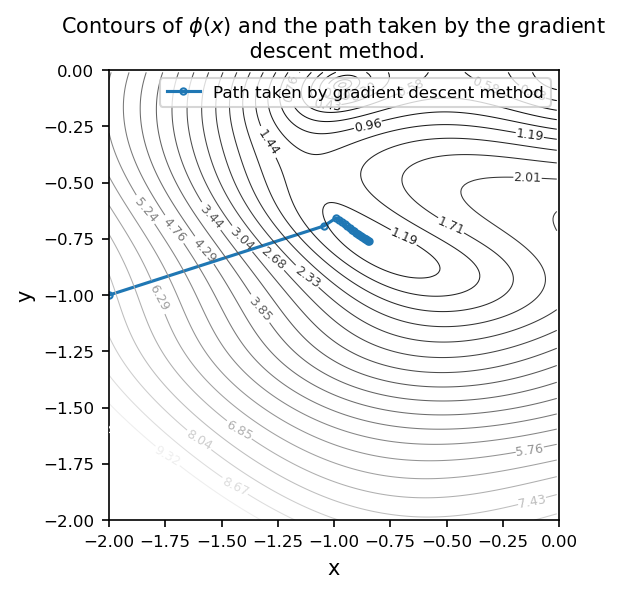

In [56]:
x0 = np.zeros((2,1), dtype=np.float64)
x0[0] = -2
x0[1] = -1

iterates = graddesc('function2','jfunction2', x0, 1e-2, 20)

fig = plt.figure(figsize=(4, 3),dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.set_aspect('equal','box')
ax.plot(iterates[0], iterates[1], marker='o', markersize=3, label=fr'Path taken by gradient descent method', markerfacecolor='none')
ax.legend(fontsize=8)
delta = 0.01
x = np.arange(-2.0, 0, delta)
y = np.arange(-2.0, 0, delta)
X, Y = np.meshgrid(x, y)
F1 = X**2 + 2*Y**2 + np.sin(2*X)
F2 = X**2 + np.cos(X + 5*Y) -1.2
Z = np.sqrt(F1**2 + F2**2)

#Plot contours
crange0 = np.linspace(0,1,30)
crange = crange0**2 * 10
CS = ax.contour(X, Y, Z, levels=crange,cmap=cm.gray, linewidths=0.5)
ax.clabel(CS, inline=True, fontsize=6)
ax.set_title('Contours of $\phi(x)$ and the path taken by the gradient \n descent method.',fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
xticks = ax.get_xticks().tolist()
if xticks[-1] < 0:
    xticks.append(0)
ax.set_xticks(xticks)
yticks = ax.get_yticks().tolist()
if yticks[-1] < 0:
    yticks.append(0)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=8)

Observing the plot of iterates using the gradient descent method, overlaid with the countours of $\phi(x)$ it is evident that the method has bcome stuck in a local minima that is not equivalent to the root of the system of equations.

(c) Modified Gradient Descent

In [ ]:
import numpy as np
from numpy.linalg import norm

def momgraddesc(fnon, jac, x0, gamma, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    lmb = 0.01
    iterates = np.array(x)
    delta0 = 0
    delta = 0

    F = eval(fnon)(x,*fnonargs)

    print(' k    f(xk)')

    # Main Newton loop
    while (np.linalg.norm(F) > tol and k < maxk):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,*fnonargs)

        # Calculate the direction - the previous value of delta has been incorporated with the momentum factor gamma
        delta = delta*gamma + 2*np.transpose(J)@F

        x = x - lmb*delta
        
        F = eval(fnon)(x,*fnonargs)
        #the current value of delta is stored over he previous value for the next iteration.
        #delta0 = delta
        iterates = np.hstack([iterates,x])
        k += 1
        print('{0:2.0f}  {1:2.2e}'.format(k, np.linalg.norm(F)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged to ')
        print(x)
    return iterates

 k    f(xk)
 1  1.22e+00
 2  1.64e+00
 3  1.68e+00
 4  1.44e+00
 5  1.07e+00
 6  1.05e+00
 7  1.04e+00
 8  1.03e+00
 9  1.03e+00
10  1.03e+00
11  1.03e+00
12  1.03e+00
13  1.03e+00
14  1.03e+00
15  1.03e+00
16  1.03e+00
17  1.03e+00
18  1.03e+00
19  1.03e+00
20  1.03e+00
21  1.03e+00
22  1.03e+00
23  1.03e+00
24  1.03e+00
25  1.03e+00
26  1.03e+00
27  1.03e+00
28  1.03e+00
29  1.03e+00
30  1.03e+00
31  1.03e+00
32  1.03e+00
33  1.03e+00
34  1.03e+00
35  1.03e+00
36  1.03e+00
37  1.03e+00
38  1.03e+00
39  1.03e+00
40  1.03e+00
41  1.03e+00
42  1.03e+00
43  1.03e+00
44  1.03e+00
45  1.03e+00
46  1.03e+00
47  1.03e+00
48  1.03e+00
49  1.03e+00
50  1.03e+00
Not converged
 k    f(xk)
 1  1.22e+00
 2  1.93e+00
 3  1.75e+00
 4  8.19e-01
 5  2.75e-01
 6  2.28e-01
 7  2.90e-01
 8  3.12e-01
 9  2.89e-01
10  2.56e-01
11  2.30e-01
12  2.15e-01
13  2.07e-01
14  2.04e-01
15  2.02e-01
16  2.01e-01
17  2.01e-01
18  2.01e-01
19  2.00e-01
20  2.00e-01
21  2.00e-01
22  2.00e-01
23  2.00e-01
24  2.00e-01


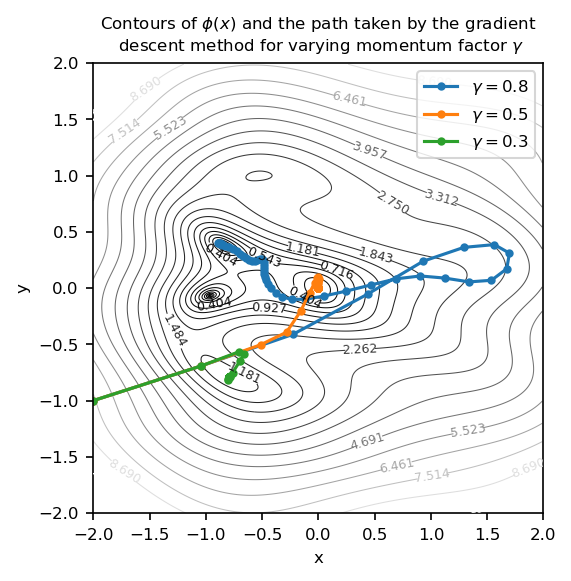

In [ ]:
import matplotlib.cm as cm
plt.rcParams['font.size'] = 8
x0 = np.zeros((2,1), dtype=np.float64)
x0[0] = -2
x0[1] = -1

iterates1 = momgraddesc('function2','jfunction2', x0, 0.3, 1e-2, 50)
iterates2 = momgraddesc('function2','jfunction2', x0, 0.5, 1e-2, 50)
iterates3 = momgraddesc('function2','jfunction2', x0, 0.8, 1e-2, 50)

fig = plt.figure(figsize=(4, 3),dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.set_aspect('equal','box')
ax.plot(iterates3[0], iterates3[1], marker='.', label=fr'$\gamma  = 0.8$')
ax.plot(iterates2[0], iterates2[1], marker='.', label=fr'$\gamma  = 0.5$')
ax.plot(iterates1[0], iterates1[1], marker='.', label=fr'$\gamma  = 0.3$')
ax.legend(fontsize=8)
delta = 0.01
x = np.arange(-2.0, 2, delta)
y = np.arange(-2.0, 2, delta)
X, Y = np.meshgrid(x, y)
F1 = X**2 + 2*Y**2 + np.sin(2*X)
F2 = X**2 + np.cos(X + 5*Y) -1.2
Z = np.sqrt(F1**2 + F2**2)

#Plot contours
crange0 = np.linspace(0,1,30)
crange = crange0**4 * 10
CS = ax.contour(X, Y, Z, levels=crange,cmap=cm.gray, linewidths=0.5)
ax.clabel(CS, inline=True, inline_spacing=1,fontsize=6)
ax.set_title('Contours of $\phi(x)$ and the path taken by the gradient \n descent method for varying momentum factor $\gamma$',fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
xticks = ax.get_xticks().tolist()
if xticks[-1] < 2:
    xticks.append(2)
ax.set_xticks(xticks)
yticks = ax.get_yticks().tolist()
if yticks[-1] < 2:
    yticks.append(2)
ax.set_yticks(yticks)